In [12]:
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [13]:
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls
import gensim #For topic modeling

In [14]:
import pyanno
import os
import os.path

In [15]:
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

In [22]:
DOSSpeeches = '/Users/Enya/Desktop/DOS_Speeches.csv'

In [19]:
import chardet 
import pandas as pd

In [26]:
DOSSpeechesDF = pd.read_csv(DOSSpeeches, encoding='Latin-1')
print (DOSSpeechesDF)

   AGENCY      Date                                              Title  \
0     DOS   12/1/16  Preventing the Exploitation of Information and...   
1     DOS  10/10/16  Keynote Address at the Singapore International...   
2     DOS   9/28/16  The Persistent Threat of North Korea and Devel...   
3     DOS   9/19/16  Statement Before the Presidential Commission o...   
4     DOS    6/3/16                                   TEDx Tysons Talk   
5     DOS   5/25/16  International Cybersecurity Strategy: Deterrin...   
6     DOS    3/1/16  Remarks by Attorney General Loretta E. Lynch a...   
7     DOS   2/26/16  Inter-American Committee Against Terrorism (CI...   
8     DOS   2/11/16  The New Face of Terrorism: Countering Violent ...   
9     DOS   7/29/15  Remarks for Panel Session "Development of Cybe...   
10    DOS    5/4/15  Department of Commerce Cybersecurity Trade Mis...   
11    DOS   2/24/15                      New Reward for Cyber Fugitive   
12    DOS   1/13/15  The North Korean 

In [30]:
DOSSpeechesDF['tokenized-text'] = DOSSpeechesDF['Speech-Text'].apply(lambda x: nltk.word_tokenize(x))

In [31]:
DOSSpeechesDF

,AGENCY,Date,Title,Topic,Speaker,Audience,Audience-Description,Location,Speech-Text,tokenized-text
0,DOS,12/1/16,Preventing the Exploitation of Information and...,Terrorism; Human Rights;,Christopher Painter,International,UN Counter-Terrorism Committee w/ Member State...,"UN HQ New York, NY",I would like to begin by thanking the UN Count...,"[I, would, like, to, begin, by, thanking, the,..."
1,DOS,10/10/16,Keynote Address at the Singapore International...,International,Christopher Painter,International,Suntec Singapore Convention & Exhibition Centre,Singpore,Good morning! Thank you to Prime Minister Lee ...,"[Good, morning, !, Thank, you, to, Prime, Mini..."
2,DOS,9/28/16,The Persistent Threat of North Korea and Devel...,North Korea,Daniel R. Russel,Domestic,Senate Foreign Relations Committee The Subcomm...,Washington DC,"Introduction. Chairman Gardner, Ranking Member...","[Introduction, ., Chairman, Gardner, ,, Rankin..."
3,DOS,9/19/16,Statement Before the Presidential Commission o...,Cybersecurity,Christopher Painter,Domestic,American University Washington College of Law,Washington DC,"Chairman Donilon, Vice Chairman Palmisano, and...","[Chairman, Donilon, ,, Vice, Chairman, Palmisa..."
4,DOS,6/3/16,TEDx Tysons Talk,NaN,Christopher Painter,Both,General,"Tysons, VA",So what do zombies have to do with diplomacy? ...,"[So, what, do, zombies, have, to, do, with, di..."
5,DOS,5/25/16,International Cybersecurity Strategy: Deterrin...,Strategy; Norms;,Christopher Painter,Domestic,Senate Foreign Relations Committee The Subcomm...,Washington DC,"Chairman Gardner, Ranking Member Cardin, membe...","[Chairman, Gardner, ,, Ranking, Member, Cardin..."
6,DOS,3/1/16,Remarks by Attorney General Loretta E. Lynch a...,Cybersecurity,Attorney General Loretta E. Lynch,NaN,RSA Conference on Cybersecurity,Washington DC,"Good afternoon, and thank you for that warm we...","[Good, afternoon, ,, and, thank, you, for, tha..."
7,DOS,2/26/16,Inter-American Committee Against Terrorism (CI...,Terrorism,Christopher Painter,NaN,NaN,Washington DC,Background: The Sixteenth Regular Session of t...,"[Background, :, The, Sixteenth, Regular, Sessi..."
8,DOS,2/11/16,The New Face of Terrorism: Countering Violent ...,Terrorism; Cyberspace;,NaN,NaN,NaN,"New York, NY",Good afternoon. IÕm looking forward to our dis...,"[Good, afternoon, ., IÕm, looking, forward, to..."
9,DOS,7/29/15,"Remarks for Panel Session ""Development of Cybe...",Cyberspace;,Michele G. Markoff,International,ASEAN Regional Forum Cyber Capacity Building W...,"Beijing, China",Thank you for the opportunity to discuss devel...,"[Thank, you, for, the, opportunity, to, discus..."


In [32]:
DOSSpeechesDF['word-counts'] = DOSSpeechesDF['tokenized-text'].apply(lambda x: len(x))

In [33]:
DOSSpeechesDF

,AGENCY,Date,Title,Topic,Speaker,Audience,Audience-Description,Location,Speech-Text,tokenized-text,word-counts
0,DOS,12/1/16,Preventing the Exploitation of Information and...,Terrorism; Human Rights;,Christopher Painter,International,UN Counter-Terrorism Committee w/ Member State...,"UN HQ New York, NY",I would like to begin by thanking the UN Count...,"[I, would, like, to, begin, by, thanking, the,...",1797
1,DOS,10/10/16,Keynote Address at the Singapore International...,International,Christopher Painter,International,Suntec Singapore Convention & Exhibition Centre,Singpore,Good morning! Thank you to Prime Minister Lee ...,"[Good, morning, !, Thank, you, to, Prime, Mini...",1749
2,DOS,9/28/16,The Persistent Threat of North Korea and Devel...,North Korea,Daniel R. Russel,Domestic,Senate Foreign Relations Committee The Subcomm...,Washington DC,"Introduction. Chairman Gardner, Ranking Member...","[Introduction, ., Chairman, Gardner, ,, Rankin...",2349
3,DOS,9/19/16,Statement Before the Presidential Commission o...,Cybersecurity,Christopher Painter,Domestic,American University Washington College of Law,Washington DC,"Chairman Donilon, Vice Chairman Palmisano, and...","[Chairman, Donilon, ,, Vice, Chairman, Palmisa...",1646
4,DOS,6/3/16,TEDx Tysons Talk,NaN,Christopher Painter,Both,General,"Tysons, VA",So what do zombies have to do with diplomacy? ...,"[So, what, do, zombies, have, to, do, with, di...",2378
5,DOS,5/25/16,International Cybersecurity Strategy: Deterrin...,Strategy; Norms;,Christopher Painter,Domestic,Senate Foreign Relations Committee The Subcomm...,Washington DC,"Chairman Gardner, Ranking Member Cardin, membe...","[Chairman, Gardner, ,, Ranking, Member, Cardin...",5154
6,DOS,3/1/16,Remarks by Attorney General Loretta E. Lynch a...,Cybersecurity,Attorney General Loretta E. Lynch,NaN,RSA Conference on Cybersecurity,Washington DC,"Good afternoon, and thank you for that warm we...","[Good, afternoon, ,, and, thank, you, for, tha...",2227
7,DOS,2/26/16,Inter-American Committee Against Terrorism (CI...,Terrorism,Christopher Painter,NaN,NaN,Washington DC,Background: The Sixteenth Regular Session of t...,"[Background, :, The, Sixteenth, Regular, Sessi...",1808
8,DOS,2/11/16,The New Face of Terrorism: Countering Violent ...,Terrorism; Cyberspace;,NaN,NaN,NaN,"New York, NY",Good afternoon. IÕm looking forward to our dis...,"[Good, afternoon, ., IÕm, looking, forward, to...",1718
9,DOS,7/29/15,"Remarks for Panel Session ""Development of Cybe...",Cyberspace;,Michele G. Markoff,International,ASEAN Regional Forum Cyber Capacity Building W...,"Beijing, China",Thank you for the opportunity to discuss devel...,"[Thank, you, for, the, opportunity, to, discus...",1772


In [41]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

DOSSpeechesDF['normalized-tokens'] = DOSSpeechesDF['tokenized-text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

DOSSpeechesDF['normalized-tokens-count'] = DOSSpeechesDF['normalized-tokens'].apply(lambda x: len(x))

DOSSpeechesDF

,AGENCY,Date,Title,Topic,Speaker,Audience,Audience-Description,Location,Speech-Text,tokenized-text,word-counts,normalized-tokens,normalized-tokens-count
0,DOS,12/1/16,Preventing the Exploitation of Information and...,Terrorism; Human Rights;,Christopher Painter,International,UN Counter-Terrorism Committee w/ Member State...,"UN HQ New York, NY",I would like to begin by thanking the UN Count...,"[I, would, like, to, begin, by, thanking, the,...",1797,"[would, like, begin, thank, un, committe, ctc,...",924
1,DOS,10/10/16,Keynote Address at the Singapore International...,International,Christopher Painter,International,Suntec Singapore Convention & Exhibition Centre,Singpore,Good morning! Thank you to Prime Minister Lee ...,"[Good, morning, !, Thank, you, to, Prime, Mini...",1749,"[good, morn, thank, prime, minist, lee, govern...",888
2,DOS,9/28/16,The Persistent Threat of North Korea and Devel...,North Korea,Daniel R. Russel,Domestic,Senate Foreign Relations Committee The Subcomm...,Washington DC,"Introduction. Chairman Gardner, Ranking Member...","[Introduction, ., Chairman, Gardner, ,, Rankin...",2349,"[introduct, chairman, gardner, rank, member, c...",1290
3,DOS,9/19/16,Statement Before the Presidential Commission o...,Cybersecurity,Christopher Painter,Domestic,American University Washington College of Law,Washington DC,"Chairman Donilon, Vice Chairman Palmisano, and...","[Chairman, Donilon, ,, Vice, Chairman, Palmisa...",1646,"[chairman, donilon, vice, chairman, palmisano,...",892
4,DOS,6/3/16,TEDx Tysons Talk,NaN,Christopher Painter,Both,General,"Tysons, VA",So what do zombies have to do with diplomacy? ...,"[So, what, do, zombies, have, to, do, with, di...",2378,"[zombi, diplomaci, well, year, ago, bad, guy, ...",1089
5,DOS,5/25/16,International Cybersecurity Strategy: Deterrin...,Strategy; Norms;,Christopher Painter,Domestic,Senate Foreign Relations Committee The Subcomm...,Washington DC,"Chairman Gardner, Ranking Member Cardin, membe...","[Chairman, Gardner, ,, Ranking, Member, Cardin...",5154,"[chairman, gardner, rank, member, cardin, memb...",2781
6,DOS,3/1/16,Remarks by Attorney General Loretta E. Lynch a...,Cybersecurity,Attorney General Loretta E. Lynch,NaN,RSA Conference on Cybersecurity,Washington DC,"Good afternoon, and thank you for that warm we...","[Good, afternoon, ,, and, thank, you, for, tha...",2227,"[good, afternoon, thank, warm, welcom, want, t...",1146
7,DOS,2/26/16,Inter-American Committee Against Terrorism (CI...,Terrorism,Christopher Painter,NaN,NaN,Washington DC,Background: The Sixteenth Regular Session of t...,"[Background, :, The, Sixteenth, Regular, Sessi...",1808,"[background, sixteenth, regular, session, comm...",935
8,DOS,2/11/16,The New Face of Terrorism: Countering Violent ...,Terrorism; Cyberspace;,NaN,NaN,NaN,"New York, NY",Good afternoon. IÕm looking forward to our dis...,"[Good, afternoon, ., IÕm, looking, forward, to...",1718,"[good, afternoon, iõm, look, forward, discuss,...",812
9,DOS,7/29/15,"Remarks for Panel Session ""Development of Cybe...",Cyberspace;,Michele G. Markoff,International,ASEAN Regional Forum Cyber Capacity Building W...,"Beijing, China",Thank you for the opportunity to discuss devel...,"[Thank, you, for, the, opportunity, to, discus...",1772,"[thank, opportun, discuss, develop, cyberspac,...",920


In [42]:
DOSfdist = nltk.ConditionalFreqDist(((len(w), w) for w in DOSSpeechesDF['normalized-tokens'].sum()))

#print the number of words
print(DOSfdist.N())

25227


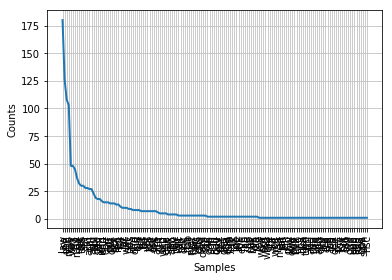

In [43]:
DOSfdist[3].plot()

In [44]:
DOSpdist = nltk.ConditionalProbDist(DOSfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(DOSpdist[2].max())

#And its probability
print(DOSpdist[2].prob(DOSpdist[2].max()))

us
0.37103174603174605


In [45]:
DOSSpeechesDF['normalized-tokens-POS'] = [nltk.pos_tag(t) for t in DOSSpeechesDF['normalized-tokens']]

In [46]:
DOSfdist_WordtoPOS = nltk.ConditionalFreqDist(DOSSpeechesDF['normalized-tokens-POS'].sum())
list(DOSfdist_WordtoPOS.items())[:10]

[('would', FreqDist({'MD': 66})),
 ('like', FreqDist({'IN': 53, 'JJ': 1, 'VB': 11})),
 ('begin', FreqDist({'NN': 5, 'VB': 9, 'VBP': 2})),
 ('thank', FreqDist({'IN': 2, 'JJ': 13, 'NN': 35, 'VB': 4, 'VBD': 8})),
 ('un', FreqDist({'JJ': 50, 'VBD': 1, 'VBP': 1})),
 ('committe', FreqDist({'NN': 11})),
 ('ctc', FreqDist({'NN': 2})),
 ('execut', FreqDist({'JJ': 3, 'NN': 4, 'RB': 1, 'VBD': 7})),
 ('director', FreqDist({'NN': 11})),
 ('cted', FreqDist({'VBD': 1}))]

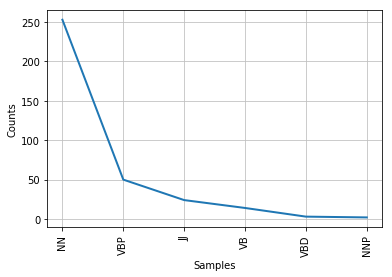

In [47]:
DOSfdist_WordtoPOS['cyber'].plot()